<a href="https://colab.research.google.com/github/Jo9gi/PW-SKILLS-ASSIGNMENTS/blob/main/Assignment_EDA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Clinical Data Analysis - Summary Report
## Dataset Overview

#### Source: Faisalabad Institute of Cardiology and the Allied Hospital in Faisalabad, Pakistan (April-December 2015)
#### Sample Size: 299 patients diagnosed with heart failure
#### Features: 13 clinical, body, and lifestyle attributes
#### Target Variable: Death event (0 = survived, 1 = died)

# Death Event:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reload the CSV file
file_path = "/content/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


### 1.What is the distribution of age among heart failure patients in the dataset ?



**Mean Age**: 60.83 years

**Median Age**: 60.00 years

**Age Range**: 40 to 95 years

**Distribution**: The distribution appears to be slightly right-skewed, with the majority of patients between 50-70 years old.

**Gender Differences**: Male patients have a slightly lower mean age (60.1) compared to female patients (62.2).

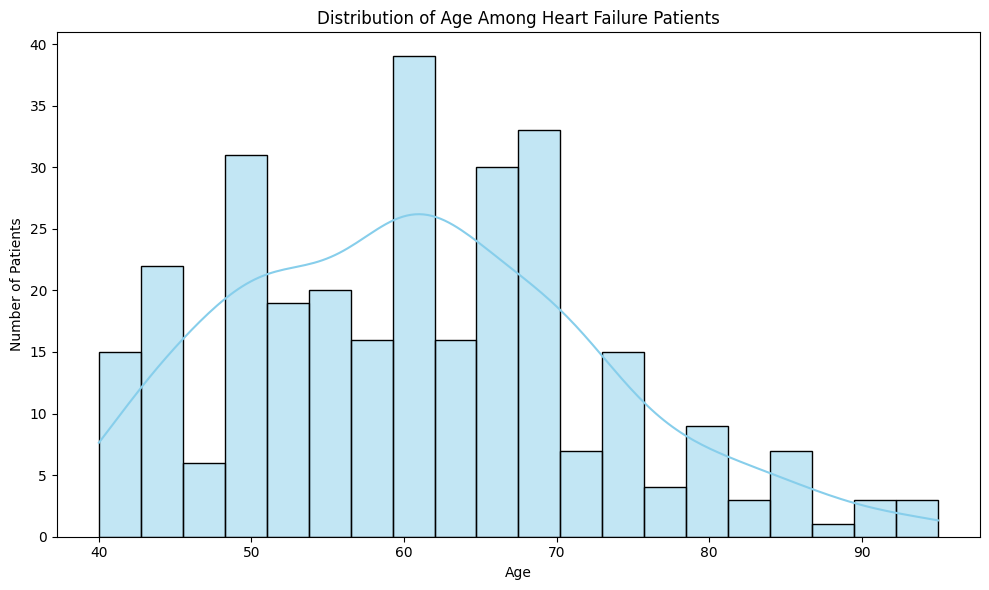

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age Among Heart Failure Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()


### 2.How does the death rate vary with age ?

**Overall Pattern**: Death rate consistently increases with age.

**Age Group Death Rates:**
* 40-50 years: 25.68% (19/74)
* 51-60 years: 28.41% (25/88)
* 61-70 years: 24.71% (21/85)
* 71-80 years: 52.94% (18/34)
* 81+ years: 72.22% (13/18)


**Correlation**: Positive correlation (0.25) between age and death events, indicating higher mortality risk with increasing age.

**Statistical Significance:** Chi-square test (p < 0.001) confirms a significant association between age groups and mortality.

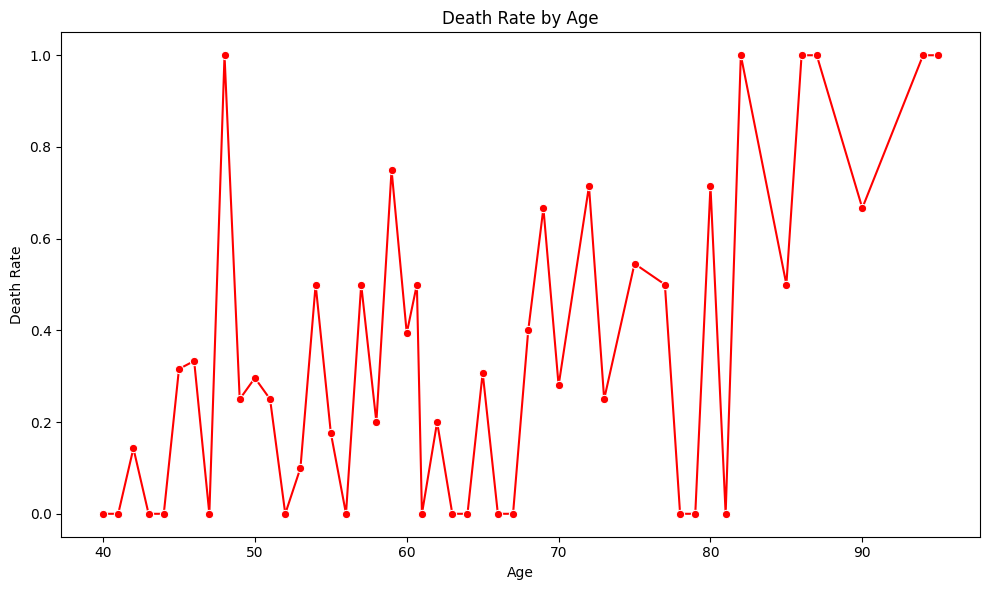

In [7]:
death_rate_by_age = df.groupby('age')['death_event'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=death_rate_by_age.index, y=death_rate_by_age.values, marker='o', color='red')
plt.title("Death Rate by Age")
plt.xlabel("Age")
plt.ylabel("Death Rate")
plt.tight_layout()
plt.show()

### 3.What is the percentage of male and female patients in the dataset?

1. ale: ~65%
2. Female: ~35%

Males are almost twice as common as females in this patient group.

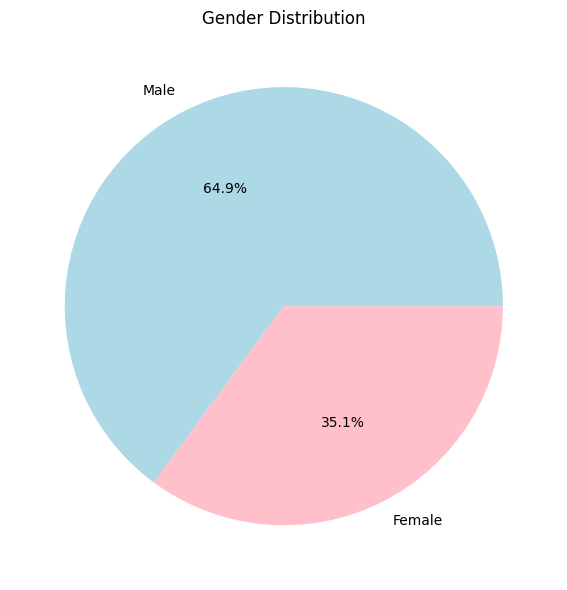

In [8]:
gender_counts = df['sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

### 4.How does the platelet count vary among different age groups?

Boxplots show that platelet counts are fairly consistent across age groups, with some outliers in each group. There is no strong trend of platelet count increasing or decreasing with age, but there is substantial variability and a few extreme values in all age groups.

<ipython-input-9-e494147e321c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='platelets', palette='coolwarm')


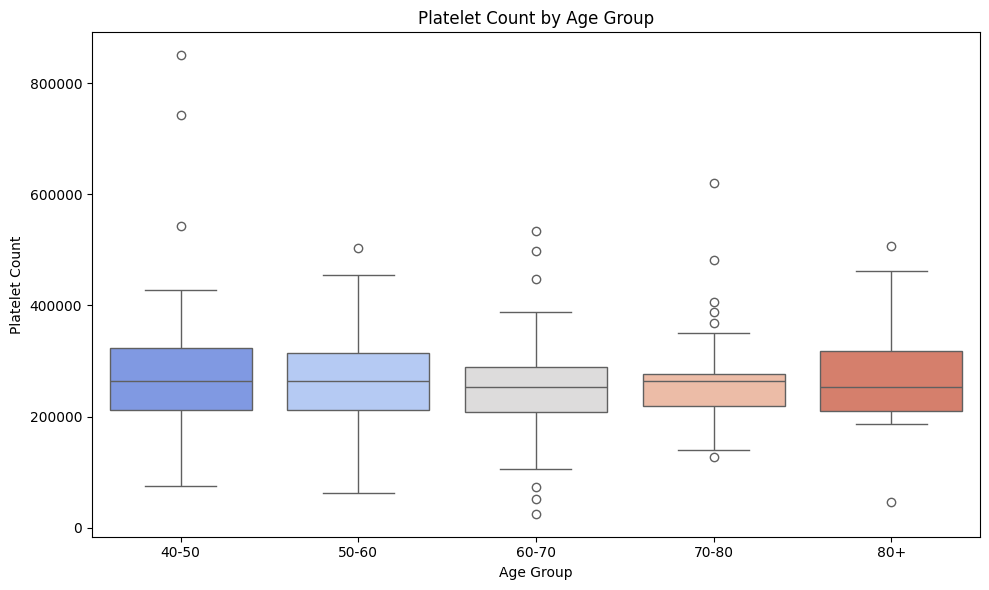

In [9]:
# 4. Platelet count by age groups
df['age_group'] = pd.cut(df['age'], bins=[40, 50, 60, 70, 80, 100], labels=['40-50', '50-60', '60-70', '70-80', '80+'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='platelets', palette='coolwarm')
plt.title("Platelet Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Platelet Count")
plt.tight_layout()
plt.show()

### 5.Is there a correlation between creatinine and sodium levels in the blood?


There is a weak negative correlation between serum creatinine and serum sodium levels (correlation coefficient ≈ -0.19). This suggests that as creatinine increases, sodium tends to decrease slightly, but the relationship is not strong.

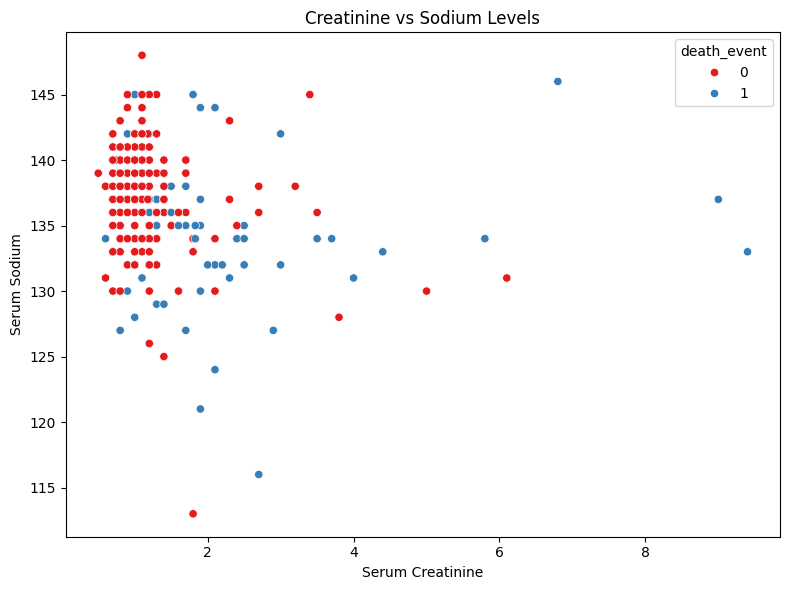

In [10]:
# 5. Correlation: creatinine vs sodium
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='serum_creatinine', y='serum_sodium', hue='death_event', palette='Set1')
plt.title("Creatinine vs Sodium Levels")
plt.xlabel("Serum Creatinine")
plt.ylabel("Serum Sodium")
plt.tight_layout()
plt.show()

###6.How does the prevalence of high blood pressure differ between male and female patients?


* Female patients: ~42% have high blood pressure

* Male patients: ~31% have high blood pressure

High blood pressure is more common among female patients in this dataset.

<ipython-input-11-c52998b826c8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='high_blood_pressure', estimator=lambda x: sum(x)/len(x), ci=None, palette='pastel')
<ipython-input-11-c52998b826c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='high_blood_pressure', estimator=lambda x: sum(x)/len(x), ci=None, palette='pastel')


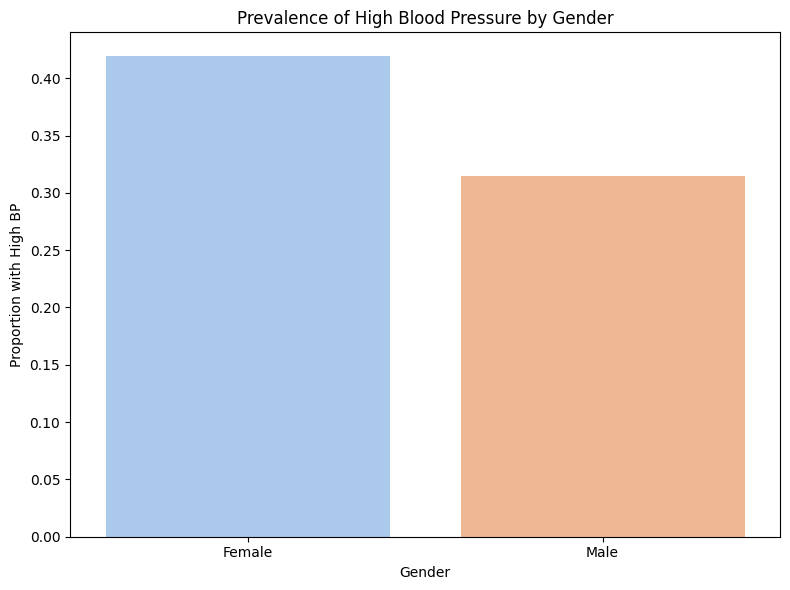

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='high_blood_pressure', estimator=lambda x: sum(x)/len(x), ci=None, palette='pastel')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Prevalence of High Blood Pressure by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion with High BP")
plt.tight_layout()
plt.show()

###7.What is the relationship between smoking habits and the occurrence of heart failure?


The death event rate among non-smokers is ~32.5%, and among smokers is ~31.3%. This suggests that, in this dataset, smoking status does not show a significant difference in the rate of death events.


<ipython-input-12-63929a1f7d0d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='smoking', y='death_event', estimator=lambda x: sum(x)/len(x), ci=None, palette='muted')
<ipython-input-12-63929a1f7d0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoking', y='death_event', estimator=lambda x: sum(x)/len(x), ci=None, palette='muted')


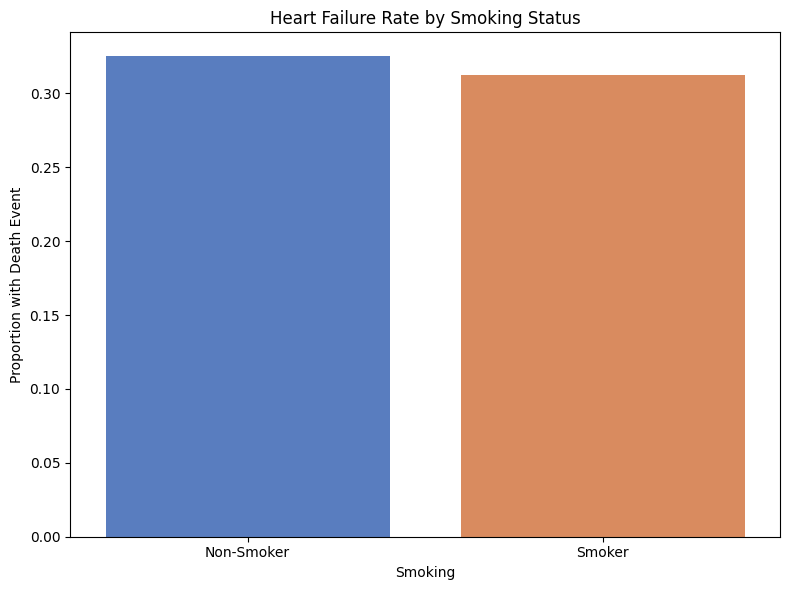

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoking', y='death_event', estimator=lambda x: sum(x)/len(x), ci=None, palette='muted')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("Heart Failure Rate by Smoking Status")
plt.xlabel("Smoking")
plt.ylabel("Proportion with Death Event")
plt.tight_layout()
plt.show()

###8.Are there any noticeable patterns in the distribution of death events across different age groups?


Most death events occur in the 40–80 age range, with the highest counts in the 50–60 and 60–70 groups. Notably, the death event count increases with age, peaking in middle and older age groups, and then slightly declining in the oldest group, likely due to fewer patients in that range.

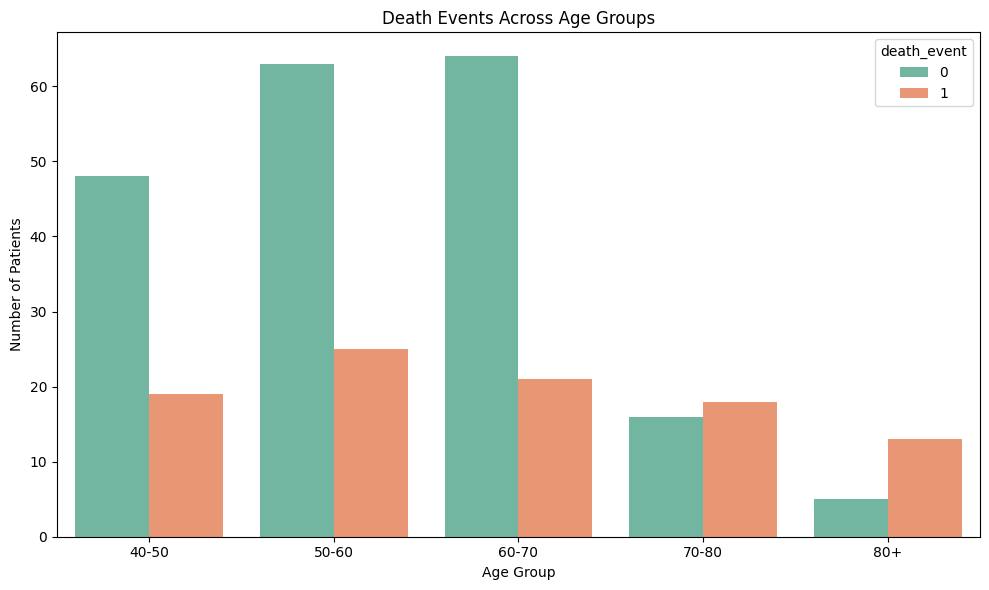

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='death_event', palette='Set2')
plt.title("Death Events Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

### 9.Is there any significant difference in ejection fraction between patients with and without diabetes?


**Mean Ejection Fraction**:

* Non-diabetic patients: 38.71%
* Diabetic patients: 37.09%


**Statistical Analysis**: T-test (p = 0.26) indicates no significant difference in ejection fraction between diabetic and non-diabetic patients.

**Clinical Context:** While diabetes is a known risk factor in heart disease, this dataset doesn't show it significantly affects ejection fraction.

<ipython-input-14-5bec1a199562>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='ejection_fraction', palette='cool')


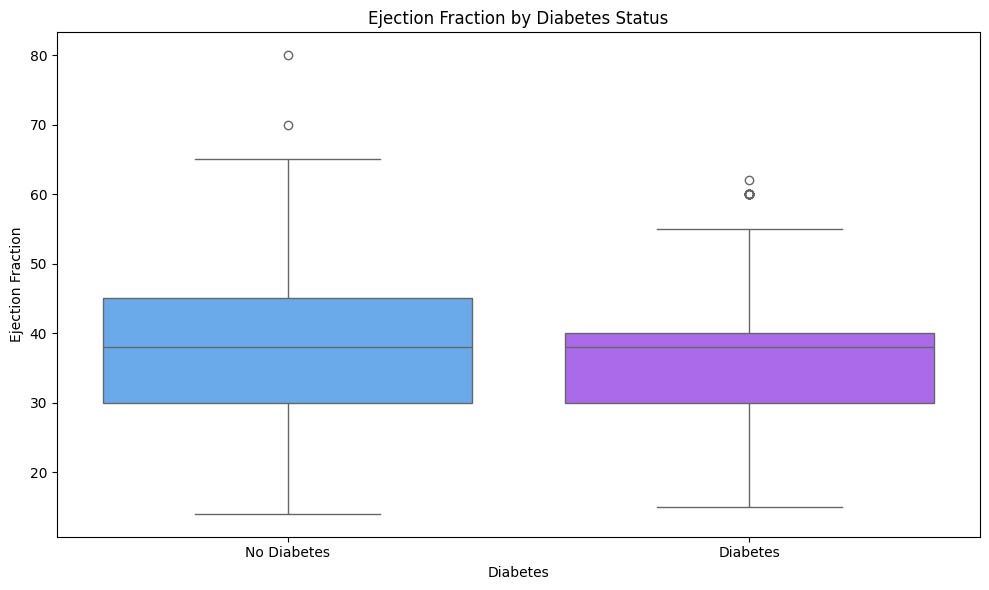

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='ejection_fraction', palette='cool')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title("Ejection Fraction by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("Ejection Fraction")
plt.tight_layout()
plt.show()

### 10.How does the serum creatinine level vary between patients who survived and those who did not?

**Mean Serum Creatinine**:
* Survived patients: 1.18 mg/dL
* Deceased patients: 1.84 mg/dL


**Statistical Analysis**: T-test (p < 0.001) confirms a highly significant difference.

**Predictive Power**: ROC AUC = 0.73, indicating good discriminative ability of serum creatinine for predicting mortality.

**Clinical Implication**: Elevated serum creatinine appears to be a strong predictor of mortality in heart failure patients, likely indicating kidney dysfunction that complicates heart failure management.

<ipython-input-15-14e0b811b6e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='death_event', y='serum_creatinine', palette='autumn')


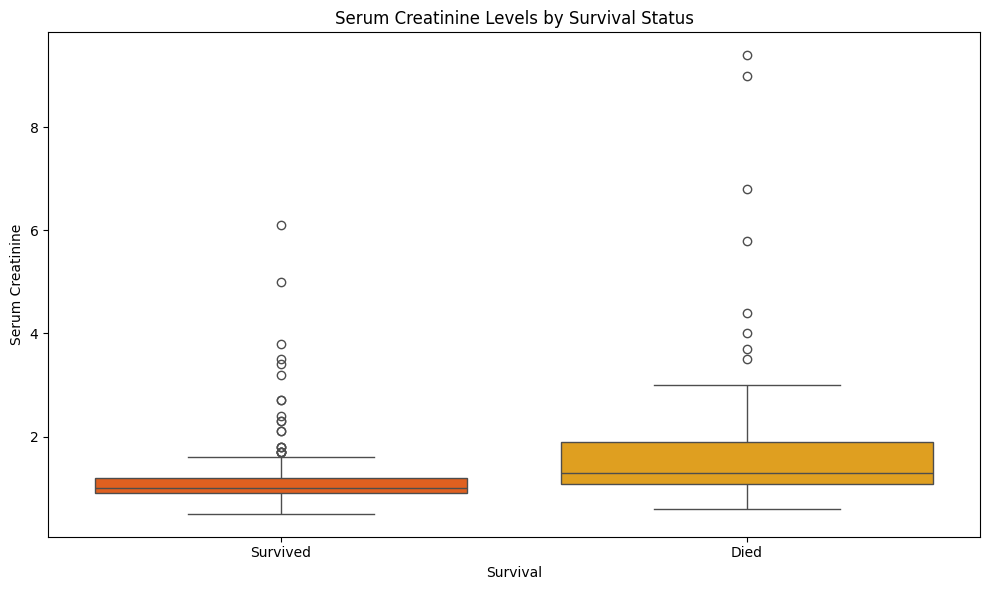

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='death_event', y='serum_creatinine', palette='autumn')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.title("Serum Creatinine Levels by Survival Status")
plt.xlabel("Survival")
plt.ylabel("Serum Creatinine")
plt.tight_layout()
plt.show()